In [1]:
# 1. Install PyTorch (with CPU or CUDA)
!pip install torch

# 2. Install Hugging Face Transformers
!pip install transformers

# 3. (Optional) Install HF hub + fix Xet warning
!pip install "huggingface_hub[hf_xet]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
pip install transformers datasets scikit-learn torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [3]:
pip install nltk pandas


In [4]:
#  Imports
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Combined_Amazon_Reviews_Updated.csv to Combined_Amazon_Reviews_Updated.csv


In [6]:
# Load your CSV file
df = pd.read_csv('Combined_Amazon_Reviews_Updated.csv')

In [7]:
print(df.columns)


Index(['reviews.text', 'reviews.rating'], dtype='object')


In [8]:
df = df[['reviews.text', 'reviews.rating']]


In [9]:
print(df.columns)

Index(['reviews.text', 'reviews.rating'], dtype='object')


In [10]:
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'  # negative
    elif rating == 3:
        return 'neutral'  # neutral
    else:
        return 'positive'  # positive

df['label'] = df['reviews.rating'].apply(map_sentiment)

In [11]:
print(df.columns)

Index(['reviews.text', 'reviews.rating', 'label'], dtype='object')


In [12]:
print(df['label'].value_counts())


label
positive    4686
neutral     2902
negative    2510
Name: count, dtype: int64


clean

In [13]:
'''import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string'''



"import nltk\nfrom nltk.corpus import stopwords\n\nnltk.download('stopwords')\nstop_words = set(stopwords.words('english'))\nimport string"

In [14]:
# Define a cleaning function
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'\d+', '', text)  # remove numbers
   # text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    #tokens = text.split()
    #tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return text #' '.join(tokens)

# Apply cleaning to the review column
df['reviews.text'] = df['reviews.text'].apply(clean_text)

In [15]:
df.head(5)

,reviews.text,reviews.rating,label
0,i thought it would be as big as small paper bu...,3.0,neutral
1,this kindle is light and easy to use especiall...,5.0,positive
2,didnt know how much i'd use a kindle so went f...,4.0,positive
3,i am happy with my purchase. i caught it on s...,5.0,positive
4,solid entry level kindle. great for kids. gift...,5.0,positive


null and duplicate review texts:

In [16]:
# Check for nulls
null_count = df['reviews.text'].isnull().sum()
print(f"Null review texts: {null_count}")


Null review texts: 0


In [17]:
duplicate_count = df.duplicated(subset='reviews.text').sum()
print(f" Duplicate review texts: {duplicate_count}")

 Duplicate review texts: 2078


In [18]:
# remove duplicates
df = df.drop_duplicates(subset='reviews.text').reset_index(drop=True)

In [19]:
duplicate_count = df.duplicated(subset='reviews.text').sum()
print(f" after remove Duplicate review texts: {duplicate_count}")

 after remove Duplicate review texts: 0


distribution

In [20]:
# Check class distribution
class_counts = df['label'].value_counts()
print(class_counts)


label
positive    4115
neutral     2063
negative    1842
Name: count, dtype: int64


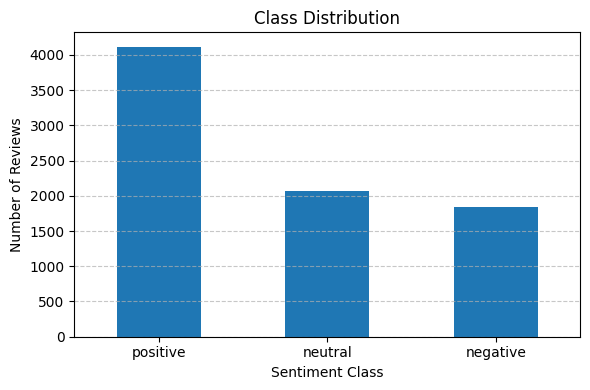

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Split into train and test

In [22]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80/20 split)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")


Train size: 6416
Test size: 1604


To check for overlap between train and test sets

In [23]:
# Check how many texts are common in both sets
overlap = set(train_df['reviews.text']).intersection(set(test_df['reviews.text']))
print(f"Number of overlapping reviews: {len(overlap)}")


Number of overlapping reviews: 0


handel inbalence

In [24]:
# Check class distribution trian set
'''class_counts = train_df['label'].value_counts()
print(class_counts)'''


"class_counts = train_df['label'].value_counts()\nprint(class_counts)"

In [25]:
from sklearn.utils import resample

# Separate classes
positive = train_df[train_df['label'] == 'positive']
neutral = train_df[train_df['label'] == 'neutral']
negative = train_df[train_df['label'] == 'negative']

# Upsample neutral
neutral_upsampled = resample(
    neutral,
    replace=True,
    #n_samples=len(positive),
    n_samples=5000 ,
    random_state=42
)

# Upsample negative
negative_upsampled = resample(
    negative,
    replace=True,
   #n_samples=len(positive),
    n_samples=5000 ,
    random_state=42
)

# Upsample positive
positive_upsampled = resample(
    positive,
    replace=True,
   #n_samples=len(positive),
    n_samples=5000 ,
    random_state=42
)
# Combine all into one balanced DataFrame
train_df = pd.concat([positive_upsampled, neutral_upsampled, negative_upsampled])

# Shuffle
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check final distribution
print(train_df['label'].value_counts())



label
negative    5000
neutral     5000
positive    5000
Name: count, dtype: int64


label
negative    5000
neutral     5000
positive    5000
Name: count, dtype: int64


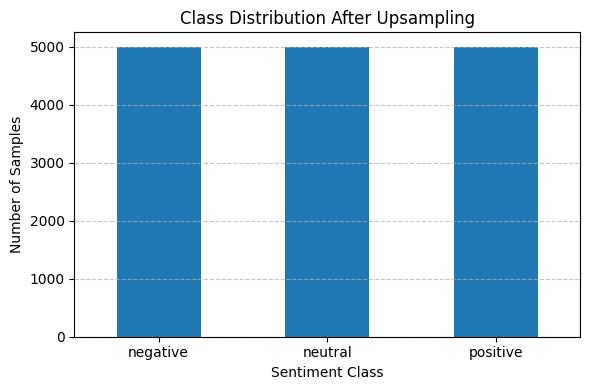

In [26]:
import matplotlib.pyplot as plt

# Check final distribution
print(train_df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(6, 4))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution After Upsampling')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
print(f"Number of rows: {train_df.shape[0]}")


Number of rows: 15000


In [28]:
# Check how many texts are common in both sets
overlap = set(train_df['reviews.text']).intersection(set(test_df['reviews.text']))
print(f"Number of overlapping reviews: {len(overlap)}")

Number of overlapping reviews: 0


more split

In [29]:
train_texts = train_df['reviews.text'].tolist()
train_labels = train_df['label'].tolist()


In [30]:
val_texts = test_df['reviews.text'].tolist()
val_labels = test_df['label'].tolist()


Encode the labels:

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

#  this mapping if you want to decode predictions later
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{np.str_('negative'): np.int64(0), np.str_('neutral'): np.int64(1), np.str_('positive'): np.int64(2)}


Tokenize the texts

In [32]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Wrap into PyTorch Dataset objects

In [33]:
import torch

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels_encoded)
val_dataset = ReviewDataset(val_encodings, val_labels_encoded)


Load the model for classification

In [34]:
!rm -rf ~/.cache/huggingface/hub/models--*


In [35]:
from transformers import BertForSequenceClassification

# Try loading a model to test
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Set up training arguments

In [36]:
from transformers import TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_dir='./logs',
    logging_steps=50,
    save_total_limit=2,  # limit saved checkpoints
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Define your evaluation metrics

In [37]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [38]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amjadahmed5608 (amjadahmed5608-ironhack) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.584200,0.629727,0.745636,0.749752,0.745636,0.740079
2,0.277900,0.659026,0.779925,0.774155,0.779925,0.776482
3,0.128300,0.944441,0.769327,0.776493,0.769327,0.771935
4,0.056500,1.041668,0.779302,0.783369,0.779302,0.780548


TrainOutput(global_step=940, training_loss=0.33343987693177896, metrics={'train_runtime': 590.5608, 'train_samples_per_second': 253.996, 'train_steps_per_second': 3.979, 'total_flos': 7893402531840000.0, 'train_loss': 0.33343987693177896, 'epoch': 4.0})

              precision    recall  f1-score   support

    negative      0.971     0.972     0.971      5000
     neutral      0.972     0.900     0.935      5000
    positive      0.923     0.990     0.956      5000

    accuracy                          0.954     15000
   macro avg      0.955     0.954     0.954     15000
weighted avg      0.955     0.954     0.954     15000



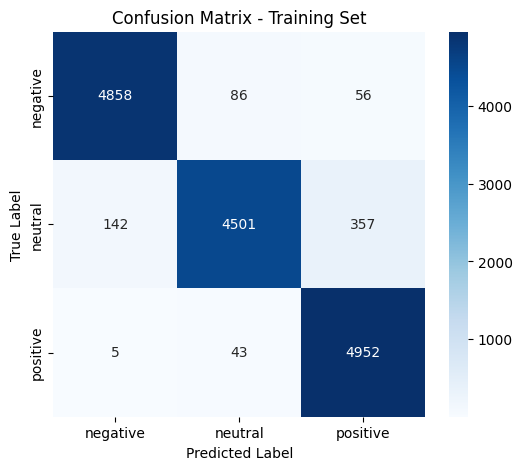

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the training dataset
train_predictions = trainer.predict(train_dataset)
train_preds = train_predictions.predictions.argmax(-1)

# True labels for training set
train_true_labels = train_labels_encoded  # make sure this is defined (your encoded labels)
target_names = label_encoder.classes_

# Print classification report
print(classification_report(train_true_labels, train_preds, target_names=target_names, digits=3))

# Plot confusion matrix
cm = confusion_matrix(train_true_labels, train_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Set')
plt.show()


              precision    recall  f1-score   support

    negative      0.727     0.739     0.733       368
     neutral      0.615     0.557     0.584       413
    positive      0.875     0.910     0.892       823

    accuracy                          0.780      1604
   macro avg      0.739     0.735     0.737      1604
weighted avg      0.774     0.780     0.776      1604



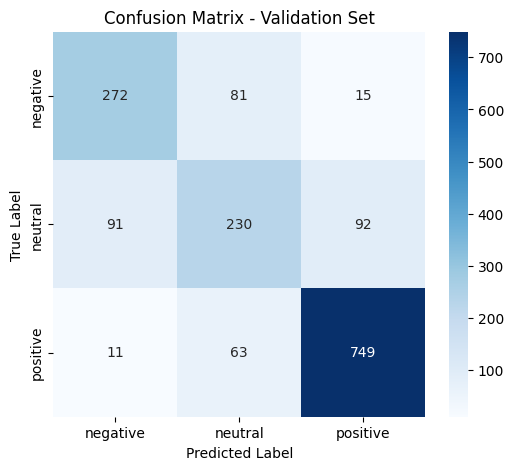

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)

# Use your manually encoded true labels
true_labels = val_labels_encoded
target_names = label_encoder.classes_

# Metrics
print(classification_report(true_labels, preds, target_names=target_names, digits=3))

# Confusion matrix
cm = confusion_matrix(true_labels, preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()


In [45]:
# Get predictions from the trainer
predictions = trainer.predict(val_dataset)

# Extract predicted labels and true labels
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids

# Count misclassified samples
num_wrong = (y_pred != y_true).sum()
print(f"Number of misclassified validation reviews: {num_wrong}")


Number of misclassified validation reviews: 353


In [47]:
# Create a temporary validation DataFrame
val_df = pd.DataFrame({
    "reviews.text": val_texts,
    "true_label": val_labels
})

# Get predictions
predictions = trainer.predict(val_dataset)
y_pred = predictions.predictions.argmax(-1)

# Decode predicted numeric labels back to text
predicted_labels = label_encoder.inverse_transform(y_pred)

# Add predictions to val_df
val_df["predicted_label"] = predicted_labels

# Filter misclassified rows
misclassified = val_df[val_df["true_label"] != val_df["predicted_label"]]

# Show how many were wrong
print(f"Number of misclassified validation reviews: {len(misclassified)}")

# Optionally view the misclassified examples
misclassified[["reviews.text", "true_label", "predicted_label"]]


Number of misclassified validation reviews: 353


,reviews.text,true_label,predicted_label
1,i bought the kindle oasis for my wife as a th-...,positive,neutral
2,i am unable to connect with ipad pro which lim...,neutral,negative
4,this was my second kindle and i didn't realize...,neutral,positive
6,cons:isn't compatible with some of my google a...,positive,neutral
15,"i was excited to purchase the amazon echo, but...",neutral,positive
...,...,...,...
1584,good tablet but no youtube kids like on iphone...,positive,neutral
1585,the kindle continues to freeze up when watchin...,negative,neutral
1591,purchased these for christmas gifts. assuming ...,positive,neutral
1596,i hate the ads. they are annoying and you cann...,neutral,negative


In [48]:
import pandas as pd

# Step 1: Recreate the validation DataFrame from your split variables
val_df = pd.DataFrame({
    "reviews.text": val_texts,       # list of review texts used in validation
    "true_label": val_labels         # original string labels (not encoded)
})

# Step 2: Get predictions from the model
predictions = trainer.predict(val_dataset)
y_pred = predictions.predictions.argmax(-1)

# Step 3: Convert predicted labels from numeric back to original labels
predicted_labels = label_encoder.inverse_transform(y_pred)

# Step 4: Add predictions to val_df
val_df["predicted_label"] = predicted_labels

# Step 5: Filter misclassified reviews
misclassified = val_df[val_df["true_label"] != val_df["predicted_label"]]

# Step 6: Save to CSV
misclassified.to_csv("misclassified_validation_reviews.csv", index=False)

print("✅ Misclassified reviews saved to 'misclassified_validation_reviews.csv'")


✅ Misclassified reviews saved to 'misclassified_validation_reviews.csv'


In [49]:
# Recreate val_df
val_df = pd.DataFrame({
    "reviews.text": val_texts,
    "true_label": val_labels
})

# Get predictions
predictions = trainer.predict(val_dataset)
y_pred = predictions.predictions.argmax(-1)

# Decode predicted labels
predicted_labels = label_encoder.inverse_transform(y_pred)

# Add predictions
val_df["predicted_label"] = predicted_labels

# Drop duplicate rows before filtering (optional but recommended)
val_df = val_df.drop_duplicates(subset=["reviews.text", "true_label"])

# Misclassified
misclassified = val_df[val_df["true_label"] != val_df["predicted_label"]]

# Count and check
print("Expected misclassified rows:", (y_pred != predictions.label_ids).sum())
print("Filtered misclassified rows:", len(misclassified))


Expected misclassified rows: 353
Filtered misclassified rows: 353


In [50]:
misclassified.to_csv("misclassified_validation_reviews.csv", index=False)
print("Misclassified reviews saved successfully!")

Misclassified reviews saved successfully!


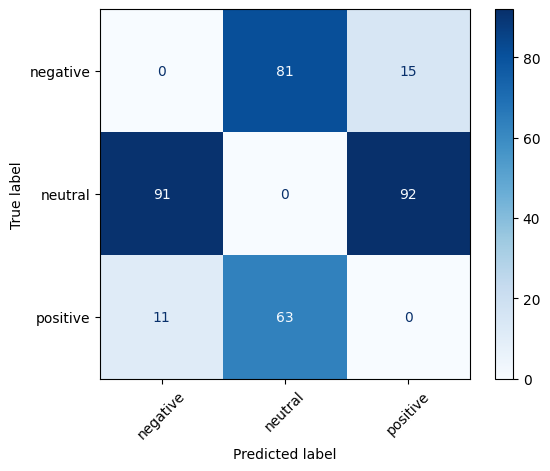

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(misclassified['true_label'], misclassified['predicted_label'], labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
